In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [20]:
raw_data = pd.read_csv('Ecommerce Customers')
raw_data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [21]:
data = raw_data.drop(['Email', 'Address', 'Avatar'], axis=1)
data.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [22]:
X = data.drop(['Yearly Amount Spent'], axis=1)
y = data['Yearly Amount Spent']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

In [24]:
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=len(X_train.columns)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1))

c:\Users\marqu\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [26]:
model.fit(X_train, y_train, epochs=400, batch_size=32)

Epoch 1/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 245126.2500 - mae: 489.1131  
Epoch 2/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 222906.5312 - mae: 464.9923 
Epoch 3/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 206427.3281 - mae: 447.9456 
Epoch 4/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 198377.4531 - mae: 437.6222 
Epoch 5/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 168073.3750 - mae: 402.5704 
Epoch 6/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 143695.2344 - mae: 371.0013 
Epoch 7/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 115032.3906 - mae: 330.6840 
Epoch 8/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 82055.1172 - mae: 276.6638 
Epoch 9/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 52892.4805 - mae: 219.7148 
Epoch 10/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29309.5742 - mae: 155.4578 
Epoch 11/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13654.2568 - mae: 99.1948  
Epoch 12/400
13/13 ━━━━━━━━━━━━━━

In [27]:
y_hat = model.predict(X_test)
y_hat

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


array([[552.07446],
       [447.83392],
       [399.60806],
       [724.187  ],
       [477.75696],
       [551.61035],
       [470.36084],
       [546.9415 ],
       [526.7832 ],
       [509.57156],
       [537.15906],
       [654.67957],
       [497.80908],
       [507.46466],
       [489.85278],
       [400.71927],
       [462.5285 ],
       [580.5923 ],
       [470.76987],
       [498.11707],
       [482.8023 ],
       [535.5563 ],
       [451.7099 ],
       [471.20612],
       [545.9941 ],
       [331.51163],
       [422.9668 ],
       [463.2589 ],
       [503.93292],
       [617.0609 ],
       [375.28546],
       [502.74402],
       [515.2857 ],
       [557.4434 ],
       [459.94107],
       [514.532  ],
       [560.6288 ],
       [600.92194],
       [541.208  ],
       [431.38953],
       [425.22046],
       [537.31647],
       [516.0776 ],
       [548.5677 ],
       [434.17017],
       [522.7622 ],
       [396.5898 ],
       [576.3899 ],
       [475.5526 ],
       [447.52005],


In [28]:
mae = mean_absolute_error(y_test, y_hat)
mse = mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_hat)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

MAE: 16.97
MSE: 423.09
RMSE: 20.57
R²: 0.94


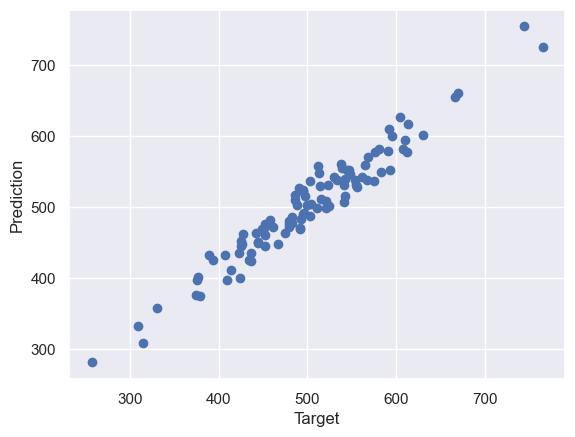

In [29]:
plt.scatter(y_test, y_hat)
plt.xlabel("Target")
plt.ylabel("Prediction")
plt.show()